In [3]:
import time
import glob
import torch
import os
import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1 _CudaDeviceProperties(name='Quadro K620', major=5, minor=0, total_memory=2048MB, multi_processor_count=3)


In [4]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    plt.axis("off")
    #plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()
    
outfd = r"./output/"

def showall(path):
    for filename in os.listdir(path):
        if filename[-4:] == ".tif":
            img = os.path.join(path,filename)
            print(img)
            imShow(img)
        elif filename[-4:] == ".jpeg" or filename[-4:] == ".jpg":
            img = os.path.join(path,filename)
            print(img)
            imShow(img)

Namespace(agnostic_nms=True, augment=True, cfg='C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg', classes=None, conf_thres=0.2, device='', fourcc='mp4v', geo=True, half=False, img_size=512, iou_thres=0.2, names='C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\acacia.names', output='./output', save_geom=True, save_label=True, save_txt=False, source='C:\\Development\\dev_tools\\tree-detector-yolo\\data\\t1f_22.tif', view_img=False, weights='C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\weights\\last_1cls_1300.pt')
Using CUDA device0 _CudaDeviceProperties(name='Quadro K620', total_memory=2048MB)

-
Tiles has been save in C:\Users\lerryw\AppData\Local\Temp\yolov3_tiles_operation

Done! Total tiles : 4

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
+
image 1/4 C:\Users\lerryw\AppData\Local\Temp\yolov3_tiles_operation\t1f_22_1.tif: 512x512 528 acacias, Done. (3.800s)
image 2/4 C:\Users\lerryw\AppData\Local\Temp\yolov3_tiles_operation\t

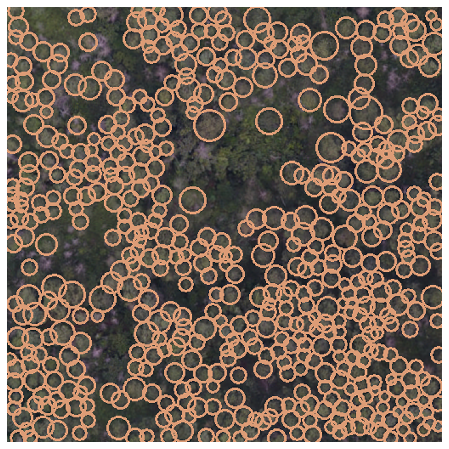

./output/t1f_22_2.tif


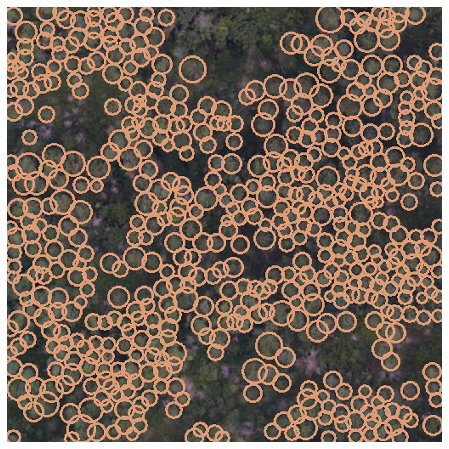

./output/t1f_22_3.tif


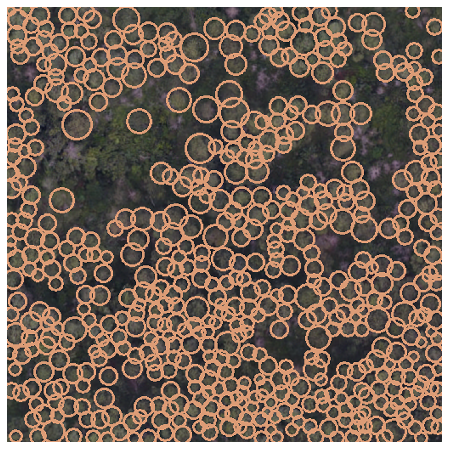

./output/t1f_22_4.tif


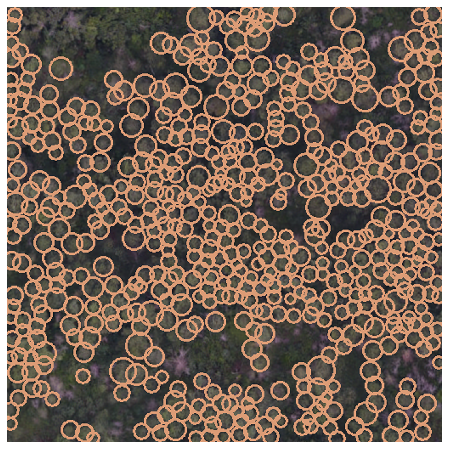

In [45]:
# t1f_22, img, t1f_30cm_127, T1F_ORTHO_withGCPs_30cm
source = "C:\\Development\\dev_tools\\tree-detector-yolo\\data\\t1f_22.tif"
cfg = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
weights = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\weights\\last_1cls_1300.pt"
names = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\acacia.names"
conf_thres = 0.2
iou_thres = 0.2

!python detect.py \
--geo \
--save-geom \
--source="{source}" \
--save-label \
--cfg="{cfg}" \
--weights="{weights}" \
--names="{names}" \
--conf-thres="{conf_thres}" \
--iou-thres="{iou_thres}" \
--agnostic-nms \
--augment

showall(outfd)

In [33]:
from PIL import Image, ImageOps

desired_size = 368
im_pth = r"C:\Development\dev_tools\tree-detector-yolo\data\t1f_30cm_.98.tif"

im = Image.open(im_pth)
old_size = im.size  # old_size[0] is in (width, height) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
# use thumbnail() or resize() method to resize the input image

# thumbnail is a in-place operation

# im.thumbnail(new_size, Image.ANTIALIAS)

im = im.resize(new_size, Image.ANTIALIAS)
# create a new image and paste the resized on it

new_im = Image.new("RGB", (desired_size, desired_size))
new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))

new_im.show()

In [ ]:
import cv2

desired_size = 368
im_pth = r"C:\Development\dev_tools\tree-detector-yolo\data\t1f_30cm_.98.tif"

im = cv2.imread(im_pth)
old_size = im.shape[:2] # old_size is in (height, width) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
print(new_size)

# new_size should be in (width, height) format

im = cv2.resize(im, (new_size[1], new_size[0]))

delta_w = desired_size - new_size[1]
delta_h = desired_size - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

color = [255, 255, 255]
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)

close_BGR = cv2.cvtColor(new_im, cv2.COLOR_GRAY2BGR)


cv2.imshow("image", close_BGR)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
from utils.slice import slice_im
image_path=r'C:\Development\dev_tools\tree-detector-yolo\data\img.tif'
out_name='slice_this'
out_dir=r'C:\Development\dev_tools\tree-detector-yolo\data\slicing'
slice_im(image_path, out_name, out_dir, sliceHeight=416, sliceWidth=416,
         zero_frac_thresh=0.2, overlap=0.2, slice_sep='_',
         out_ext='.tif', verbose=False)

Read in image: C:\Development\dev_tools\tree-detector-yolo\data\img.tif
image.shape: (2572, 3768, 3)
50


In [11]:
from utils.utils import to_tiles
image_path=r'C:\Development\dev_tools\tree-detector-yolo\data\t1f_22.tif'
out_dir=r'C:\Development\dev_tools\tree-detector-yolo\data\test_opencv'
to_tiles(image_path,out_dir,416,416)

Temporary slicing image is in C:\Users\lerryw\temp_slicing
t1f_22
407 407
Tiles has been save in C:\Development\dev_tools\tree-detector-yolo\data\test_opencv
Done! Total tiles : 4


In [ ]:
# source ="C:\\Map\\Deep_learning\\digital_globe\\011802594010_01\\pansharp_rgb_tiles\\765\\tiles"
# cfg ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg"
# weights ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_300.pt"
# names ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
# outDir="C:\\Map\\Deep_learning\\digital_globe\\011802594010_01\\pansharp_rgb_tiles\\765\\yolo"
# conf_thres = 0.2
# iou_thres = 0.1

# !python detect.py \
# --save-label \
# --source="{source}" \
# --cfg="{cfg}" \
# --weights="{weights}" \
# --names="{names}" \
# --conf-thres="{conf_thres}" \
# --iou-thres="{iou_thres}" \
# --output="{outDir}" \
# --augment

# # showall(outDir)

In [ ]:
# source ="C:\\Map\\Deep_learning\\digital_globe\\011802594010_01\\pansharp_rgb_tiles\\765\\tiles"
# cfg ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg"
# weights ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_500.pt"
# names ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
# outDir="C:\\Map\\Deep_learning\\digital_globe\\011802594010_01\\pansharp_rgb_tiles\\765\\yolo"
# conf_thres = 0.2
# iou_thres = 0.1 

# !python detect.py \
# --source="{source}" \
# --save-label \
# --cfg="{cfg}" \
# --weights="{weights}" \
# --names="{names}" \
# --conf-thres="{conf_thres}" \
# --iou-thres="{iou_thres}" \
# --output="{outDir}" \
# --augment

# # showall(outfd)

In [ ]:
from utils.utils import to_tiles
path_wv=r"C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\keresa.tif"
outFd = r"C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\using_slice"
to_tiles(path_wv,outFd,416,416)

In [ ]:
# Slice image
from utils.slice import slice_im
input_img=r'C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\keresa.tif'
out_name='img_sliced'
out_dir=r'C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\using_slice'
slice_im(input_img,out_name,out_dir,sliceHeight=416, sliceWidth=416,
         zero_frac_thresh=0.2, overlap=0, slice_sep='_',
         out_ext='.png', verbose=False)

In [ ]:
import cv2
import numpy as np
img=cv2.imread(input_img, cv2.IMREAD_LOAD_GDAL)

In [ ]:
with rio.open(input_img) as src:
    if src.transform is None or src.crs is None:
        raise SystemExit(print("[ ERROR! ] Input image file " + inputfile + \
                               " is not a geographic raster. System exit!"))
    # frame = src.read()
    image_crs = src.crs
    affine = src.transform
    src_meta = src.profile

In [ ]:
tile_window = rasterio.windows.Window(0, 0, 416, 416)
tile_affine = rasterio.windows.transform(tile_window, smaller_image_affine)
tile_image = smaller_image[(slice(None),) + tile_window.toslices()]

In [ ]:
out_img = np.transpose(img, (2, 0, 1))

In [ ]:
import rasterio as rio
outdir=r'C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\test_out.tif'
with rio.open(outdir, 'w', **src_meta) as dst:
    dst.write(out_img, [3, 2, 1])

In [ ]:
from models import convert
convert(cfg=r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\cfg\yolov3_spp_1cls_op.cfg',
        weights=r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\weights\best_oilpalm_wv_500.pt')

In [ ]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm
def plots(start=0, stop=0, bucket='', id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 4, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    # s = ['GIoU', 'Objectness', 'Classification', 'Precision', 'Recall',
    #      'val GIoU', 'val Objectness', 'val Classification', 'mAP@0.5', 'F1']
    s = ['GIoU', 'Objectness', 'Precision', 'Recall',
         'val GIoU', 'val Objectness', 'mAP@0.5', 'F1']
    if bucket:
        os.system('rm -rf storage.googleapis.com')
        files = ['https://storage.googleapis.com/%s/results%g.txt' % (bucket, x) for x in id]
    else:
        files = glob.glob(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\*_wv_*.txt') #+ glob.glob('../../Downloads/results*.txt')

    for f in sorted(files,reverse=True):
        try:
            # results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            results = np.loadtxt(f, usecols=[2, 3, 8, 9, 12, 13, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(8):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
    fig.savefig(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results.png', dpi=360)

plots()

In [ ]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm
def plots(start=0, stop=0, bucket='', id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 2, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    s = ['Precision', 'Recall', 'mAP@0.5', 'F1']
    files = glob.glob(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results_oilpalm_wv_500.txt') #+ glob.glob('../../Downloads/results*.txt')
    for f in sorted(files):
        try:
            results = np.loadtxt(f, usecols=[8, 9, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(4):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
    fig.savefig(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results_oilpalm_wv_500.png', dpi=360)

plots()

In [ ]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm
def plots(start=0, stop=0, bucket='', id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 1, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    # s = ['GIoU', 'Objectness', 'Classification', 'Precision', 'Recall',
    #      'val GIoU', 'val Objectness', 'val Classification', 'mAP@0.5', 'F1']
    s = ['GIoU', 'val GIoU']
    if bucket:
        os.system('rm -rf storage.googleapis.com')
        files = ['https://storage.googleapis.com/%s/results%g.txt' % (bucket, x) for x in id]
    else:
        files = glob.glob(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results_oilpalm_wv_500.txt') #+ glob.glob('../../Downloads/results*.txt')
    for f in sorted(files):
        try:
            # results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            results = np.loadtxt(f, usecols=[2, 12], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(2):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
#     fig.savefig(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results.png', dpi=360)

plots()